# Libraries

In [1]:
import numpy as np
import seaborn as sns
from pprint import pprint
from mlpocket.tabular import *
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression

sns.set_style('darkgrid')

# Config

In [2]:
class Config:
    data_dir = "tps_aug_2022"
    label = "failure"
    output_dir = "outputs/submissions/tps_aug_2022"
    test_size = 0.33
    seed = 42

# Data

## Loading

In [3]:
_, _, train = load_data(path=f"../data/raw/{Config.data_dir}/train.csv", labels=[Config.label])
test = load_data(path=f"../data/raw/{Config.data_dir}/test.csv")

## Visualization

In [4]:
print(train.shape)
print(test.shape)

(26570, 26)
(20775, 25)


In [31]:
display(train.head())
display(test.head())

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [5]:
train.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

In [6]:
train.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [7]:
train.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


### NaN statistics

In [8]:
get_nan_stats(train)


Printing percentage of NaN values per columns
id:  0.0 0/26570 columns
product_code:  0.0 0/26570 columns
loading:  0.00940910801656003 250/26570 columns
attribute_0:  0.0 0/26570 columns
attribute_1:  0.0 0/26570 columns
attribute_2:  0.0 0/26570 columns
attribute_3:  0.0 0/26570 columns
measurement_0:  0.0 0/26570 columns
measurement_1:  0.0 0/26570 columns
measurement_2:  0.0 0/26570 columns
measurement_3:  0.014339480617237487 381/26570 columns
measurement_4:  0.020248400451637186 538/26570 columns
measurement_5:  0.02544222807677832 676/26570 columns
measurement_6:  0.029958599924727138 796/26570 columns
measurement_7:  0.035265336846066996 937/26570 columns
measurement_8:  0.03944298080541964 1048/26570 columns
measurement_9:  0.046179902145276626 1227/26570 columns
measurement_10:  0.048927361686112156 1300/26570 columns
measurement_11:  0.0552502822732405 1468/26570 columns
measurement_12:  0.060255927738050434 1601/26570 columns
measurement_13:  0.06676703048550997 1774/26570

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
5,5,A,75.35,material_7,material_8,9,5,11,4,0,...,10.622,14.904,19.107,13.327,15.354,19.251,NaN,17.625,832.902,0
6,6,A,161.71,material_7,material_8,9,5,12,2,4,...,11.370,17.714,19.924,11.560,16.653,17.734,NaN,16.637,684.438,1
8,8,A,109.50,material_7,material_8,9,5,9,6,5,...,11.557,15.965,19.604,14.091,15.674,13.327,13.535,15.408,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26560,26560,E,126.63,material_7,material_6,6,9,3,15,1,...,10.551,17.820,19.687,10.510,NaN,15.712,14.733,19.311,NaN,0
26562,26562,E,108.35,material_7,material_6,6,9,6,8,3,...,11.256,17.274,22.033,NaN,16.177,15.000,15.163,15.535,935.448,0
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0


### Data distributions

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
5598,5598,108.58,8,8,12,14,12,18.386,10.849,19.714,...,9.030,16.456,18.372,10.703,15.828,16.158,16.695,17.097,791.195,0
21192,21192,136.42,6,6,7,5,6,19.530,10.970,17.290,...,10.491,14.140,19.600,NaN,14.944,NaN,12.790,17.171,538.368,0
8555,8555,254.11,8,8,3,7,3,17.692,11.882,16.616,...,11.456,15.066,18.940,11.914,18.236,15.848,14.477,17.556,800.990,1
12758,12758,178.19,5,8,3,9,5,17.786,12.029,18.408,...,12.844,16.413,19.032,10.024,14.920,16.069,15.482,17.363,843.667,0
20754,20754,148.00,6,6,13,8,5,17.610,11.204,18.014,...,12.596,17.179,NaN,14.173,14.603,15.863,NaN,18.562,875.499,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,6446,139.66,8,8,4,3,5,18.039,11.840,18.997,...,11.878,19.174,18.380,10.874,13.253,17.924,16.386,13.948,870.473,0
17128,17128,100.32,6,6,3,11,4,18.592,12.313,18.471,...,11.724,16.946,18.842,9.801,15.933,16.415,NaN,16.373,770.170,0
18786,18786,122.99,6,6,2,8,3,18.679,11.910,16.997,...,12.542,19.021,17.574,11.991,16.866,16.965,13.912,NaN,838.974,0
462,462,238.88,9,5,11,3,11,16.430,12.710,18.138,...,11.815,15.058,18.613,10.410,15.509,13.163,13.845,13.851,719.115,1


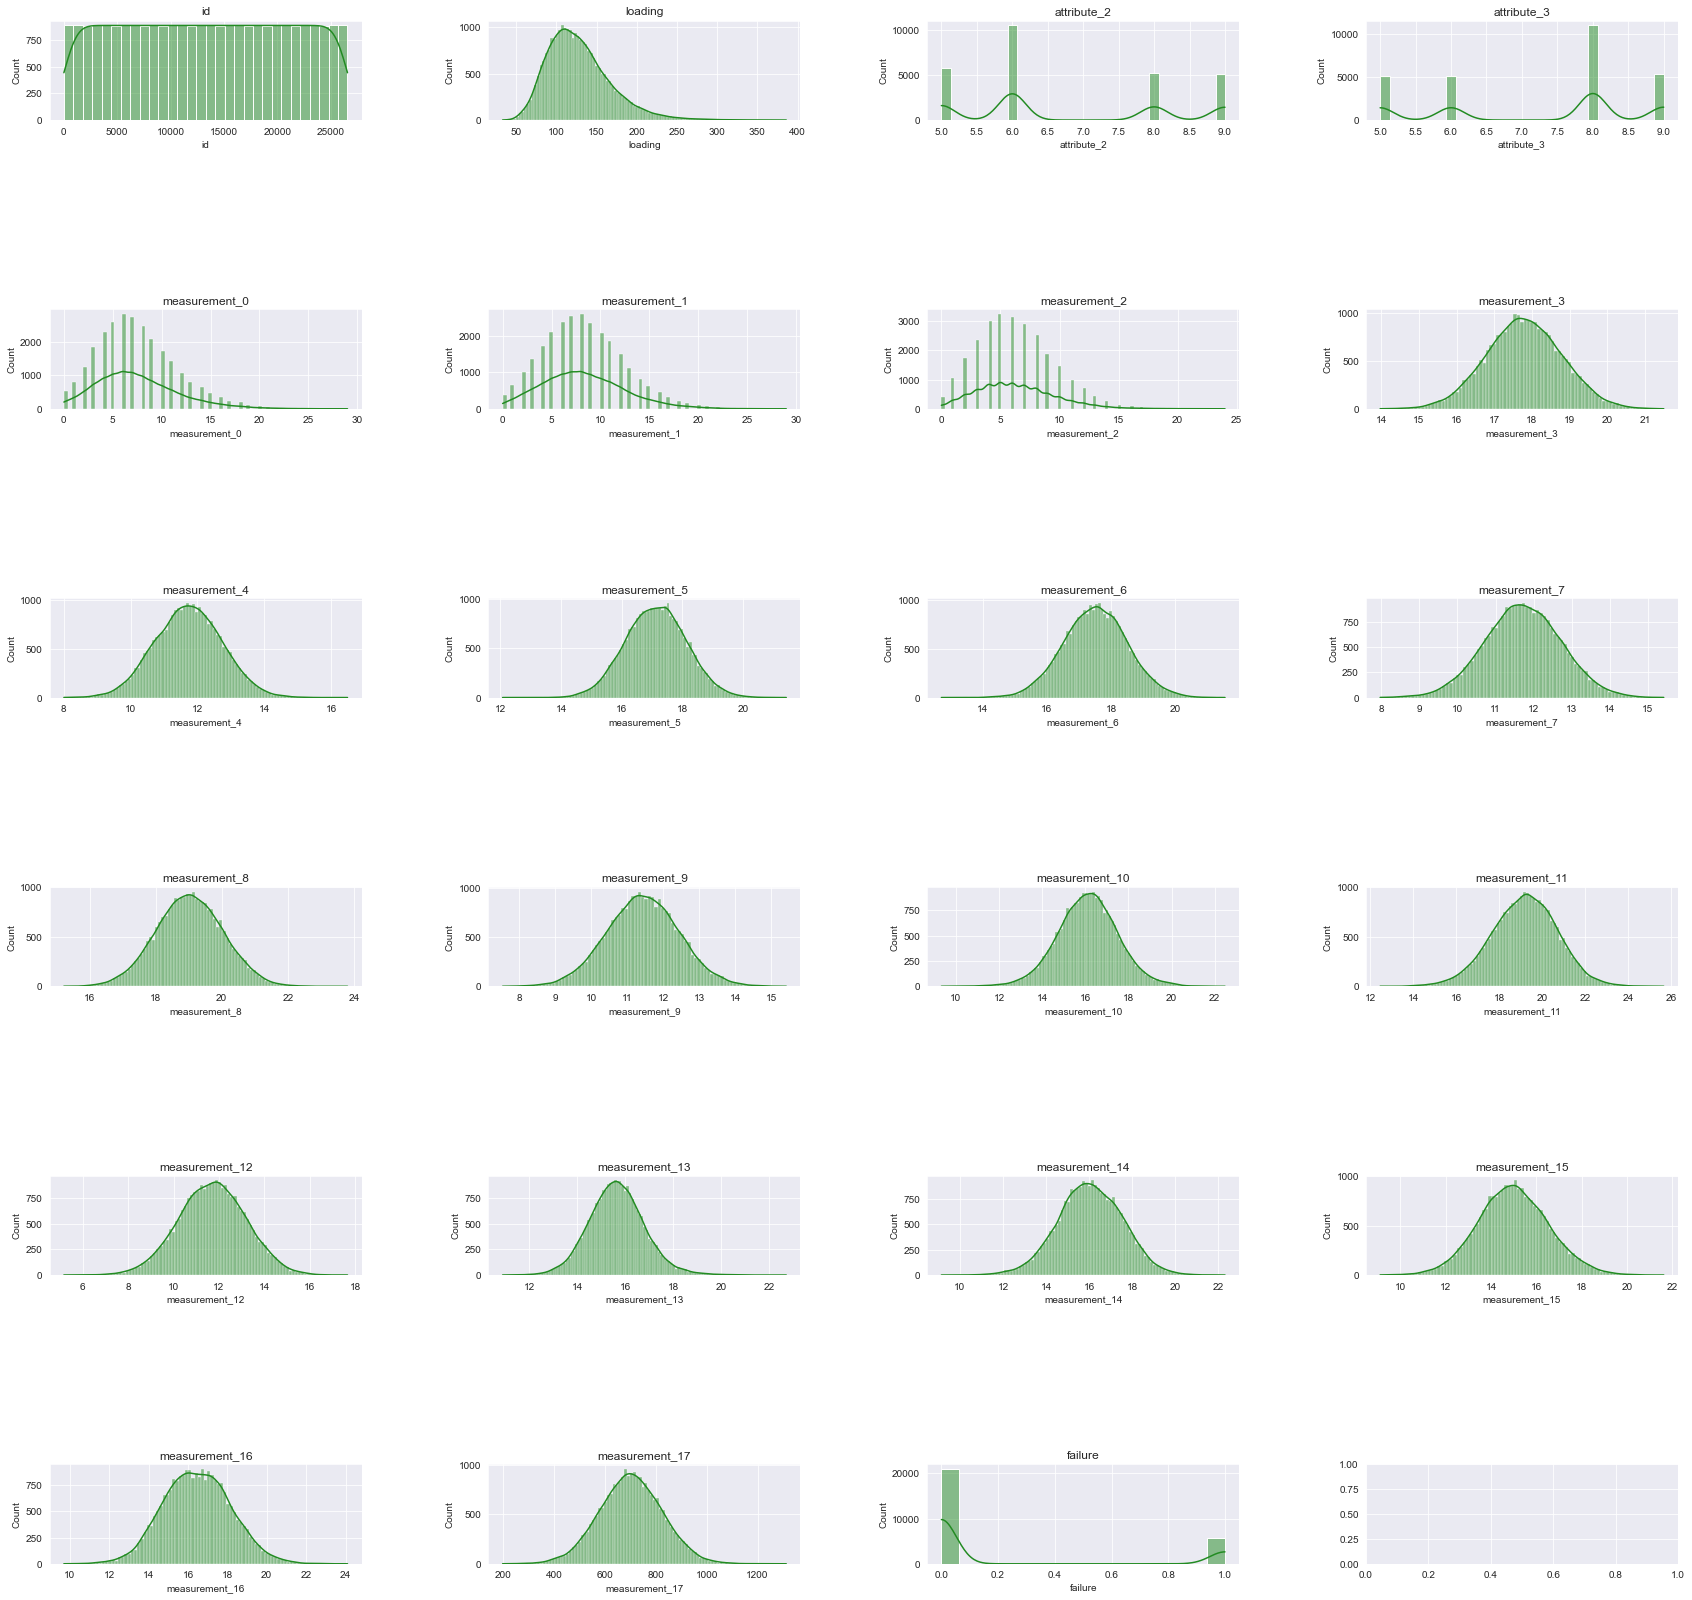

In [9]:
plot_columns_dist(train)

### Correlation of values

<AxesSubplot:>

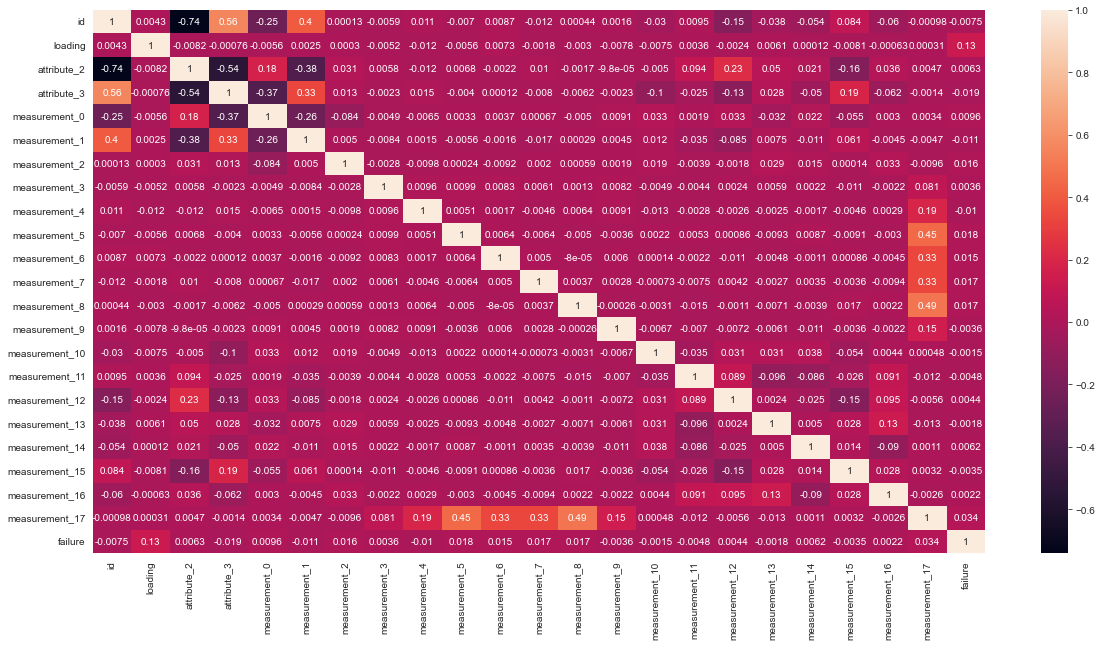

In [10]:
plot_corr(train)

### Class Imbalance

In [11]:
train[Config.label].value_counts(normalize=True)

0    0.787392
1    0.212608
Name: failure, dtype: float64

<AxesSubplot:xlabel='failure', ylabel='count'>

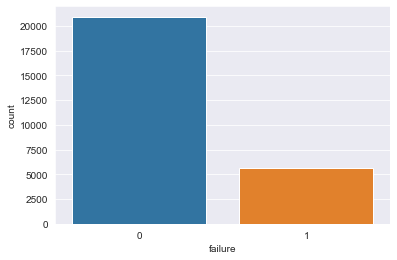

In [12]:
sns.countplot(x=train[Config.label])

### Features  <span style="color: green;font-weight: bold;">(data-specific visualization)</span>

#### Product code

In [13]:
feature="product_code"

##### Who is highest?

<AxesSubplot:xlabel='count', ylabel='product_code'>

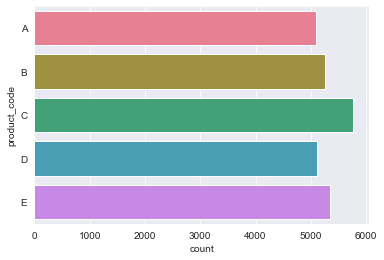

In [14]:
sns.countplot(y=feature, data=train, palette="husl")

##### Who contributes the most to the labels?

<AxesSubplot:xlabel='product_code', ylabel='count'>

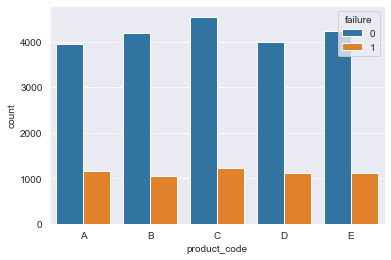

In [15]:
sns.countplot(data=train, x=feature, hue=Config.label)

## Preprocessing

In [16]:
to_drop = set()

### Fill missing values

In [17]:
def fill_missing(df):
    df = df.copy()
    
    # write all the function to deal with missing values here
    
    for i in range(18):
        # unimodal normal distribution from visualization
        df[f'measurement_{i}'].fillna(value=df[f'measurement_{i}'].mean(), inplace=True)
    
    # unimodal normal distribution from visualization
    df['loading'].fillna(value=df['loading'].mean(), inplace=True)
    
    return df

In [18]:
train_no_missing = fill_missing(train)
test_no_missing = fill_missing(test)

#### To drop if any

In [19]:
to_drop = to_drop.union([])

### Categorical to Dummies

In [20]:
columns = ["attribute_0", "attribute_1", "attribute_2", "attribute_3"]

In [21]:
train_dummies, test_dummies = to_dummies(train_no_missing, test_no_missing, columns)

#### To drop if any

In [22]:
to_drop = to_drop.union(columns)

### Drop Columns

In [23]:
train_final = drop(train_dummies, to_drop)
test_final = drop(test_dummies, to_drop)

### Result

In [24]:
len(train_final.columns)

30

In [25]:
train_final.columns

Index(['id', 'product_code', 'loading', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure', 'attribute_0_material_7', 'attribute_0_material_5',
       'attribute_1_material_5', 'attribute_1_material_6', 'attribute_2_9',
       'attribute_2_6', 'attribute_3_5', 'attribute_3_9'],
      dtype='object')

In [26]:
train_final.head()

,id,product_code,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_17,failure,attribute_0_material_7,attribute_0_material_5,attribute_1_material_5,attribute_1_material_6,attribute_2_9,attribute_2_6,attribute_3_5,attribute_3_9
0,0,A,80.10,7,8,4,18.040,12.518,15.748,19.292,...,764.100,0,1,0,0,0,1,0,1,0
1,1,A,84.89,14,3,3,18.213,11.540,17.717,17.893,...,682.057,0,1,0,0,0,1,0,1,0
2,2,A,82.43,12,1,5,18.057,11.652,16.738,18.240,...,663.376,0,1,0,0,0,1,0,1,0
3,3,A,101.07,13,2,6,17.295,11.188,18.576,18.339,...,826.282,0,1,0,0,0,1,0,1,0
4,4,A,188.06,9,2,8,19.346,12.950,16.990,15.746,...,579.885,0,1,0,0,0,1,0,1,0


# Modeling

## Baseline Algorithms

In [27]:
train_final_split, val_final_split = train_test_split(train_final, test_size=Config.test_size, random_state=Config.seed)

In [28]:
X_train, y_train = drop(train_final_split, [Config.label]), train_final_split[Config.label]

In [29]:
X_val, y_val = drop(val_final_split, [Config.label]), val_final_split[Config.label]

### Logistic Regression

# Testing